In [252]:
# Stock Prediction - Create addtional features using existing Features

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyodbc

# For Training, Testing and building a Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing,model_selection

from datetime import datetime

import pickle

In [210]:
conn_str = ('server=WIN-EEL3AK31AJF;database=DatapyDB;TRUSTED_CONNECTION=yes')
#df = pd.read_csv('D:\\data\\XBIT_12032019.csv')

In [211]:
conn = pyodbc.connect(r'DRIVER={ODBC Driver 13 for SQL Server};' + conn_str)

In [212]:
sql = "SELECT * from [DatapyDB].[dbo].[vwStock] where StockSym = 'ROK'"
df = pd.read_sql(sql,conn)

In [213]:
df.head()

,StockSym,StockDt,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol,StockAdjClose1,StockAdjClose2,StockVol1,StockVol2
0,ROK,2014-01-02,117.62,117.99,116.011,116.38,101.888,479100,NaN,NaN,NaN,NaN
1,ROK,2014-01-03,116.61,118.01,116.445,117.83,103.158,606600,101.888,NaN,479100.0,NaN
2,ROK,2014-01-06,118.20,118.74,116.120,116.52,102.011,662300,103.158,101.888,606600.0,479100.0
3,ROK,2014-01-07,117.57,117.57,115.780,117.04,102.466,556200,102.011,103.158,662300.0,606600.0
4,ROK,2014-01-08,117.28,117.28,115.710,116.47,101.967,785500,102.466,102.011,556200.0,662300.0


In [214]:
df.tail(1)

,StockSym,StockDt,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol,StockAdjClose1,StockAdjClose2,StockVol1,StockVol2
1492,ROK,2019-12-05,196.02,196.65,195.32,196.43,196.43,543592,149.93,72.44,16055655.0,3500595.0


In [215]:
df = df.drop(['StockSym'],axis=1)
df = df.drop(['StockDt'],axis=1)

In [216]:
print(df.head())

   StockOpen  StockHigh  StockLow  StockClose  StockAdjClose  StockVol  \
0     117.62     117.99   116.011      116.38        101.888    479100   
1     116.61     118.01   116.445      117.83        103.158    606600   
2     118.20     118.74   116.120      116.52        102.011    662300   
3     117.57     117.57   115.780      117.04        102.466    556200   
4     117.28     117.28   115.710      116.47        101.967    785500   

   StockAdjClose1  StockAdjClose2  StockVol1  StockVol2  
0             NaN             NaN        NaN        NaN  
1         101.888             NaN   479100.0        NaN  
2         103.158         101.888   606600.0   479100.0  
3         102.011         103.158   662300.0   606600.0  
4         102.466         102.011   556200.0   662300.0  


In [217]:
days_infuture_to_predict = 1

df['prediction'] = df[['StockAdjClose']].shift(-days_infuture_to_predict)

#df['volume_lag2'] = df[['volume_lag1']].shift(-days_infuture_to_predict)
#df['volume_lag3'] = df[['volume_lag2']].shift(-days_infuture_to_predict)
#df['close_lag1'] = df[['Close']].shift(-days_infuture_to_predict)
#df['volume_lag1'] = df[['Volume']].shift(-days_infuture_to_predict)

In [218]:
df.head()

,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol,StockAdjClose1,StockAdjClose2,StockVol1,StockVol2,prediction
0,117.62,117.99,116.011,116.38,101.888,479100,NaN,NaN,NaN,NaN,103.158
1,116.61,118.01,116.445,117.83,103.158,606600,101.888,NaN,479100.0,NaN,102.011
2,118.20,118.74,116.120,116.52,102.011,662300,103.158,101.888,606600.0,479100.0,102.466
3,117.57,117.57,115.780,117.04,102.466,556200,102.011,103.158,662300.0,606600.0,101.967
4,117.28,117.28,115.710,116.47,101.967,785500,102.466,102.011,556200.0,662300.0,101.932


In [219]:
df.tail(days_infuture_to_predict + 1)

,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol,StockAdjClose1,StockAdjClose2,StockVol1,StockVol2,prediction
1491,194.62,197.56,194.56,195.01,195.01,911537,194.04,149.31,981834.0,25192145.0,196.43
1492,196.02,196.65,195.32,196.43,196.43,543592,149.93,72.44,16055655.0,3500595.0,NaN


In [220]:
df.describe()

,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol,StockAdjClose1,StockAdjClose2,StockVol1,StockVol2,prediction
count,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000,1.493000e+03,1492.000000,1491.000000,1.492000e+03,1.491000e+03,1492.000000
mean,142.485831,143.799259,141.135980,142.477723,134.244558,9.479438e+05,108.155062,84.276425,8.687056e+05,2.547801e+06,134.266245
std,30.374386,30.622641,30.069957,30.288680,32.685998,4.749733e+05,52.593112,54.226792,1.024286e+06,9.083505e+06,32.686211
min,89.470000,90.750000,87.525000,89.710000,82.093000,1.838380e+05,0.400000,0.160000,3.000000e+02,3.000000e+02,82.093000
25%,115.410000,116.395000,114.460000,115.550000,104.295000,6.458390e+05,96.508750,16.260000,5.335748e+05,4.957245e+05,104.321250
50%,136.080000,136.850000,135.210000,136.210000,127.936000,8.546330e+05,107.645000,101.113000,7.770495e+05,7.647130e+05,127.941000
75%,169.110000,170.750000,167.130000,169.120000,164.682000,1.126886e+06,151.000500,110.933500,1.074965e+06,1.151219e+06,164.693500
max,210.660000,210.720000,205.710000,207.920000,200.270000,6.596561e+06,198.750000,191.386000,2.519214e+07,1.839965e+08,200.270000


In [221]:
df.dropna(inplace=True)

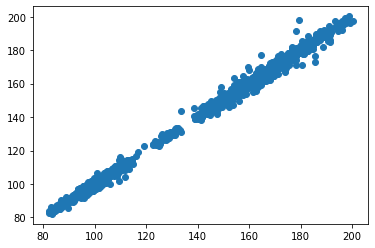

In [222]:
plt.scatter(df['StockAdjClose'],df['prediction'])

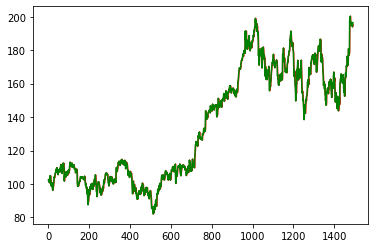

In [223]:
plt.plot(df['StockAdjClose'],color='red')
plt.plot(df['prediction'],color='green')

In [224]:
df.head()

,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol,StockAdjClose1,StockAdjClose2,StockVol1,StockVol2,prediction
2,118.20,118.74,116.12,116.52,102.011,662300,103.158,101.888,606600.0,479100.0,102.466
3,117.57,117.57,115.78,117.04,102.466,556200,102.011,103.158,662300.0,606600.0,101.967
4,117.28,117.28,115.71,116.47,101.967,785500,102.466,102.011,556200.0,662300.0,101.932
5,116.75,117.33,115.03,116.43,101.932,537700,101.967,102.466,785500.0,556200.0,102.396
6,116.82,117.30,115.96,116.96,102.396,503500,101.932,101.967,537700.0,785500.0,100.741


In [225]:
df.tail(1)

,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol,StockAdjClose1,StockAdjClose2,StockVol1,StockVol2,prediction
1491,194.62,197.56,194.56,195.01,195.01,911537,194.04,149.31,981834.0,25192145.0,196.43


In [226]:
X = np.array(df.drop(['prediction'],1))

In [227]:
X

array([[1.1820000e+02, 1.1874000e+02, 1.1612000e+02, ..., 1.0188800e+02,
        6.0660000e+05, 4.7910000e+05],
       [1.1757000e+02, 1.1757000e+02, 1.1578000e+02, ..., 1.0315800e+02,
        6.6230000e+05, 6.0660000e+05],
       [1.1728000e+02, 1.1728000e+02, 1.1571000e+02, ..., 1.0201100e+02,
        5.5620000e+05, 6.6230000e+05],
       ...,
       [1.9668000e+02, 1.9862000e+02, 1.9377000e+02, ..., 6.8000000e-01,
        3.3077500e+05, 9.2608000e+06],
       [1.9114000e+02, 1.9483000e+02, 1.9021000e+02, ..., 7.0650000e+01,
        2.5192145e+07, 2.6526880e+06],
       [1.9462000e+02, 1.9756000e+02, 1.9456000e+02, ..., 1.4931000e+02,
        9.8183400e+05, 2.5192145e+07]])

In [228]:
len(X)

1490

In [229]:
df.describe()

,StockOpen,StockHigh,StockLow,StockClose,StockAdjClose,StockVol,StockAdjClose1,StockAdjClose2,StockVol1,StockVol2,prediction
count,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1.490000e+03,1490.000000,1490.000000,1.490000e+03,1.490000e+03,1490.000000
mean,142.483956,143.798418,141.133048,142.475570,134.245402,9.487589e+05,108.131232,84.284369,8.587745e+05,2.547162e+06,134.308770
std,30.359060,30.608259,30.053601,30.272631,32.658503,4.750977e+05,52.617029,54.244130,9.462940e+05,9.086521e+06,32.687505
min,89.470000,90.750000,87.525000,89.710000,82.093000,1.838380e+05,0.400000,0.160000,3.000000e+02,3.000000e+02,82.093000
25%,115.395000,116.383750,114.437500,115.527500,104.343250,6.467242e+05,96.502250,16.170000,5.337178e+05,4.955122e+05,104.385250
50%,136.205000,137.325000,135.305000,136.215000,127.941000,8.558120e+05,107.645000,101.141500,7.770495e+05,7.641080e+05,128.030500
75%,169.110000,170.715000,167.125000,169.095000,164.645750,1.127280e+06,151.009500,110.940750,1.074854e+06,1.150636e+06,164.716500
max,210.660000,210.720000,205.710000,207.920000,200.270000,6.596561e+06,198.750000,191.386000,2.519214e+07,1.839965e+08,200.270000


In [230]:
X = X[:-days_infuture_to_predict]

In [231]:
len(X)

1489

In [232]:
y = np.array(df['prediction'])

In [233]:
len(y)

1490

In [234]:
y = y[:-days_infuture_to_predict]

In [235]:
len(y)

1489

In [236]:
y

array([102.466, 101.967, 101.932, ..., 193.97 , 194.04 , 195.01 ])

In [237]:
#X = preprocessing.scale(X)
#y = preprocessing.scale(y)
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.5,random_state=0)

In [238]:
clf = DecisionTreeRegressor() 
#clf = LinearRegression() 
clf.fit(xtrain, ytrain)
r = clf.score(xtest,ytest)
#prediction = (clf.predict(X_prediction))

In [239]:
r

0.9923128755475883

In [256]:
# Saving the model to a file using pickle module

modelFileName = 'C:\\Dev\\dtrModelToPredictFutureStockPrice.sav'
pickle.dump(clf, open(modelFileName, 'wb'))

In [240]:
ypred = clf.predict(xtest)
dfAP=pd.DataFrame({'Actual':ytest, 'Predicted':ypred})
dfAP

,Actual,Predicted
0,104.909,107.354
1,114.145,111.063
2,174.723,172.017
3,95.599,95.903
4,191.377,177.673
...,...,...
740,107.212,106.148
741,106.554,102.626
742,107.347,105.936
743,106.980,109.052


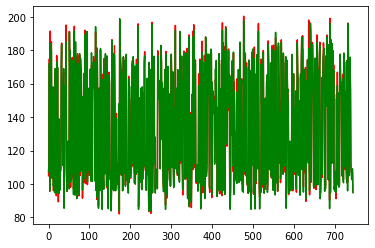

In [241]:
plt.plot(ytest,color="red")
plt.plot(ypred,color="green")


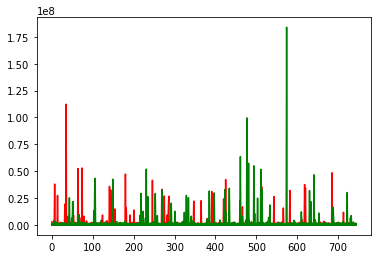

In [242]:
plt.plot(xtrain,color="red")
plt.plot(xtest,color="green")

In [243]:
x_forecast = np.array(df.drop(['prediction'],1))[-days_infuture_to_predict:]

In [244]:
len(x_forecast)

1

In [245]:
x_forecast

array([[1.9462000e+02, 1.9756000e+02, 1.9456000e+02, 1.9501000e+02,
        1.9501000e+02, 9.1153700e+05, 1.9404000e+02, 1.4931000e+02,
        9.8183400e+05, 2.5192145e+07]])

In [246]:
prediction = (clf.predict(x_forecast))

In [247]:
prediction

array([191.096])

In [248]:
last = prediction[len(prediction) -1 ]

In [249]:
last

191.096

In [250]:
prediction[0]

191.096

In [257]:
predictModel = pickle.load(open(modelFileName, 'rb'))
predict = predictModel.predict(x_forecast)
print(predict)

[191.096]
